<a href="https://colab.research.google.com/github/bs2537/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Bhav_Copy_of_DS_Unit_1_Sprint_Challenge_1_0919.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [1]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

--2019-09-14 01:06:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data’

haberman.data       100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-09-14 01:06:43 (111 MB/s) - ‘haberman.data’ saved [3103/3103]



In [4]:
! head haberman.data

30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1


In [31]:
# Load the data in pandas dataframe
df = pd.read_csv('haberman.data')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [0]:
# rename columns
df.columns = ['age_at_surgery', 'year_at_surgery', 'no_positive_axilary_nodes', 'survival_status']

In [41]:
# show first five rows
df.head(5)

,age_at_surgery,year_at_surgery,no_positive_axilary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [42]:
#finding missing values
df.isna().sum()

# there are no missing values from the output below

age_at_surgery               0
year_at_surgery              0
no_positive_axilary_nodes    0
survival_status              0
dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [43]:
# shape of data
df.shape

(305, 4)

In [44]:
# summary statistics
df.describe()

,age_at_surgery,year_at_surgery,no_positive_axilary_nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [48]:
# ****let us see the distribution of no of positive axillary nodes into survival status since these two variables are correlated theoretically****

bins = pd.cut(df['no_positive_axilary_nodes'], 5)  
pd.crosstab(df['survival_status'], bins)
# In the below table output , survival status > 5 years = 1, < 5 years = 2

no_positive_axilary_nodes,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
survival_status,,,,,
1,207,11,5,0,1
2,58,15,6,1,1


In [50]:
ct = pd.crosstab(bins, [df['no_positive_axilary_nodes'], df['survival_status']], normalize='columns')
ct

no_positive_axilary_nodes 0     1     2     3     ... 23 24 25 28 30 35 46 52
survival_status            1  2  1  2  1  2  1  2 ...  2  2  1  1  1  2  1  2
no_positive_axilary_nodes                         ...                        
0                          1  1  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
1                          0  0  1  1  0  0  0  0 ...  0  0  0  0  0  0  0  0
2                          0  0  0  0  1  1  0  0 ...  0  0  0  0  0  0  0  0
3                          0  0  0  0  0  0  1  1 ...  0  0  0  0  0  0  0  0
4                          0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
5                          0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
6                          0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
7                          0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
8                          0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
9                          0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
10                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
11                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
12                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
13                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
14                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
15                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
16                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
17                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
18                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
19                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
20                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
21                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
22                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0
23                         0  0  0  0  0  0  0  0 ...  1  0  0  0  0  0  0  0
24                         0  0  0  0  0  0  0  0 ...  0  1  0  0  0  0  0  0
25                         0  0  0  0  0  0  0  0 ...  0  0  1  0  0  0  0  0
28                         0  0  0  0  0  0  0  0 ...  0  0  0  1  0  0  0  0
30                         0  0  0  0  0  0  0  0 ...  0  0  0  0  1  0  0  0
35                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  1  0  0
46                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  1  0
52                         0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  1

[31 rows x 50 columns]

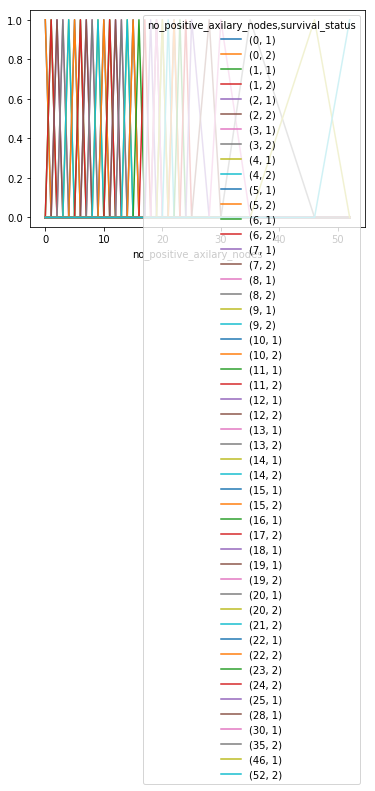

In [51]:
# Creating Plots

ct.plot()

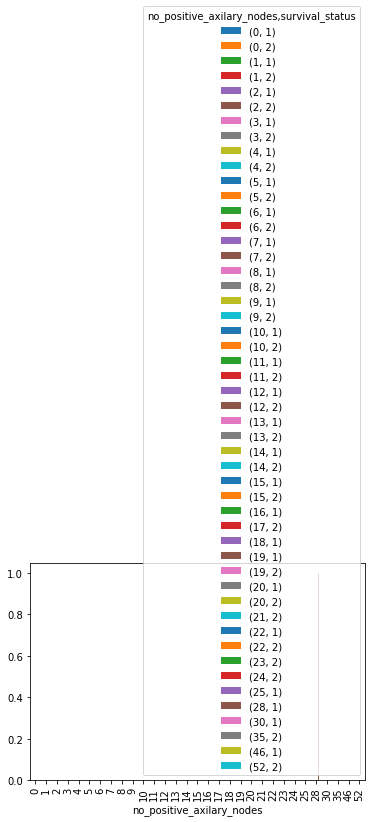

In [52]:
ct.plot(kind='bar')

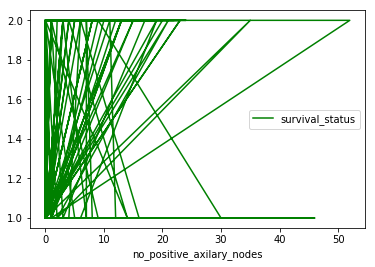

In [56]:
df.plot(x='no_positive_axilary_nodes', y='survival_status', color='g')

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [104]:
#extracting the required columns from dataframe
df[['survival_status', 'no_positive_axilary_nodes', 'age_at_surgery']]


,survival_status,no_positive_axilary_nodes,age_at_surgery
0,1,3,30
1,1,0,30
2,1,2,31
3,1,4,31
4,1,10,33
5,1,0,33
6,2,0,34
7,2,9,34
8,1,30,34
9,1,1,34


In [105]:
cols = ['survival_status', 'no_positive_axilary_nodes', 'age_at_surgery']
survival_status = df[cols]
survival_status

,survival_status,no_positive_axilary_nodes,age_at_surgery
0,1,3,30
1,1,0,30
2,1,2,31
3,1,4,31
4,1,10,33
5,1,0,33
6,2,0,34
7,2,9,34
8,1,30,34
9,1,1,34


In [111]:
#dataframe for individuals who survived >5 years

survival_status.loc[:, 'survival_status'] = 1
survival_status.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,survival_status,no_positive_axilary_nodes,age_at_surgery
0,1,3,30
1,1,0,30
2,1,2,31
3,1,4,31
4,1,10,33


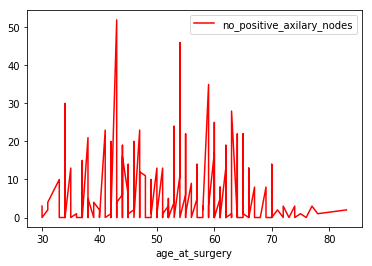

In [126]:
# creating a plot for age at surgery and number of positive axillary nodes for patients who survived > 5 years

import matplotlib.pyplot as plt
import seaborn

df.plot(x='age_at_surgery', y='no_positive_axilary_nodes', color='r')

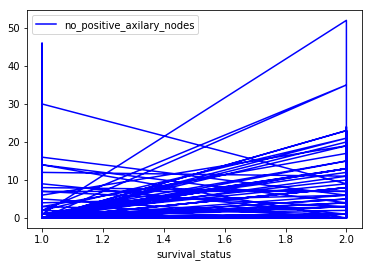

In [129]:
df.plot(x='survival_status', y='no_positive_axilary_nodes', color='b')

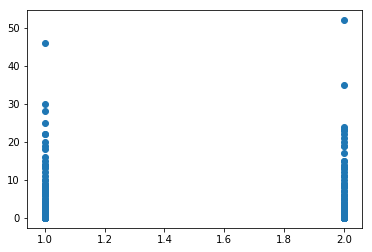

In [142]:
plt.scatter(df['survival_status'], df['no_positive_axilary_nodes'])
plt.show ()

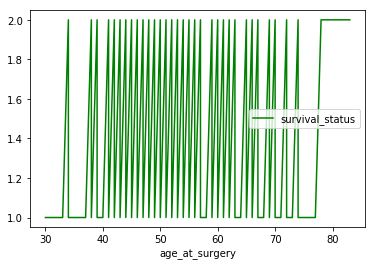

In [136]:
df.plot(x='age_at_surgery', y='survival_status', color='g')

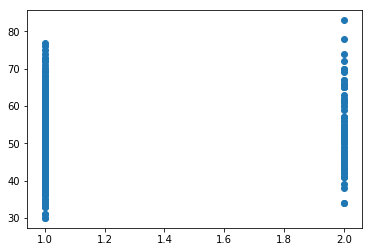

In [143]:
plt.scatter(df['survival_status'], df['age_at_surgery'])
plt.show ()

In [0]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


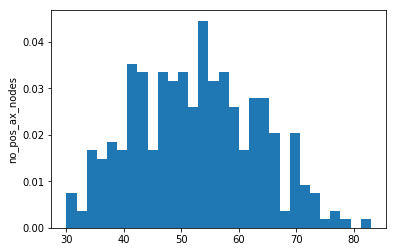

In [149]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = df["age_at_surgery"]
y = df["no_positive_axilary_nodes"]
plt.hist(x, normed=True, bins=30)
plt.ylabel('no_pos_ax_nodes');

FROM ABOVE HISTOGRAM, NUMBER OF POSITIVE AXILLARY NODES APPEARS INVERSELY RELATED TO AGE AT SURGERY

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


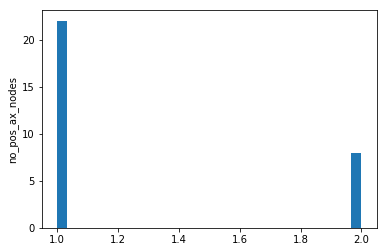

In [150]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = df["survival_status"]
y = df["no_positive_axilary_nodes"]
plt.hist(x, normed=True, bins=30)
plt.ylabel('no_pos_ax_nodes');

FROM ABOVE HISTOGRAM, NUMBER OF AXILLARY NODES APPEARS TO HAVE A POSITIVE RELATION TO SURVIVAL

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


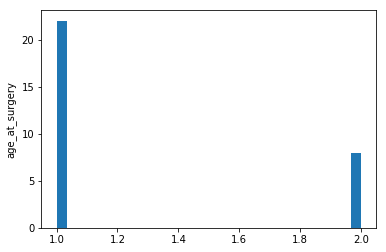

In [151]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = df["survival_status"]
y = df["age_at_surgery"]
plt.hist(x, normed=True, bins=30)
plt.ylabel('age_at_surgery');

FROM ABOVE HISTOGRAM, AGE AT SURGERY APPEARS TO HAVE A POSITIVE RELATION TO SURVIVAL

In [127]:
#dataframe for individuals who survived <5 years
survival_status.loc[:, 'survival_status'] = 2
survival_status.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,survival_status,no_positive_axilary_nodes,age_at_surgery
0,2,3,30
1,2,0,30
2,2,2,31
3,2,4,31
4,2,10,33


## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### 1. Number of positive axillary nodes appears to have a POSITIVE relationship with survival.
### 2. Number of positive axillary nodes appears to have a INVERSE relationship with age at surgery.
### 3. Age at surgery appears to have a POSITIVE relation with survival. 



In [135]:
# Linaer regression between Number of positive axillary nodes and survival status.


import numpy as np
from sklearn.linear_model import LinearRegression
X = df[['survival_status']].as_matrix()
print (X)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [132]:
Y = df[['no_positive_axilary_nodes']].as_matrix().reshape(-1, 1)
print (Y)

[[ 3]
 [ 0]
 [ 2]
 [ 4]
 [10]
 [ 0]
 [ 0]
 [ 9]
 [30]
 [ 1]
 [10]
 [ 7]
 [ 0]
 [13]
 [ 0]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 6]
 [15]
 [ 0]
 [21]
 [ 2]
 [ 0]
 [ 0]
 [ 3]
 [ 1]
 [ 0]
 [11]
 [ 1]
 [ 5]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 2]
 [ 4]
 [ 2]
 [ 0]
 [ 0]
 [23]
 [ 0]
 [ 0]
 [ 0]
 [ 8]
 [ 0]
 [ 0]
 [ 8]
 [ 0]
 [ 0]
 [ 1]
 [ 0]
 [ 0]
 [ 1]
 [ 2]
 [ 4]
 [20]
 [ 0]
 [ 1]
 [52]
 [ 2]
 [ 0]
 [ 0]
 [14]
 [ 2]
 [ 3]
 [ 0]
 [ 2]
 [ 0]
 [ 4]
 [ 6]
 [ 9]
 [19]
 [ 0]
 [ 1]
 [ 0]
 [16]
 [ 6]
 [ 0]
 [ 1]
 [ 0]
 [ 0]
 [14]
 [ 0]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 5]
 [20]
 [ 0]
 [ 3]
 [ 0]
 [23]
 [ 0]
 [ 0]
 [ 0]
 [ 6]
 [ 0]
 [ 0]
 [ 3]
 [ 4]
 [ 4]
 [12]
 [11]
 [11]
 [ 7]
 [ 8]
 [ 2]
 [ 0]
 [ 0]
 [ 0]
 [10]
 [ 1]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 3]
 [ 0]
 [ 1]
 [13]
 [ 0]
 [ 0]
 [ 6]
 [ 0]
 [ 1]
 [ 1]
 [ 2]
 [ 0]
 [ 0]
 [ 4]
 [ 1]
 [13]
 [ 3]
 [ 7]
 [ 1]
 [ 0]
 [ 1]
 [ 3]
 [ 2]
 [ 3]
 [ 4]
 [ 0]
 [ 4]
 [ 0]
 [ 4]
 [ 5]
 [ 0]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 4]
 [ 1]
 [ 3]
 [ 9]
 [24]
 [12]
 [ 1]
 [ 1]
 [ 2]
 [ 1]
 [ 0]
 [11

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [133]:
model = LinearRegression().fit(X, Y)
r_sq = model.score(X, Y)
print ('Coefficient of determination, R2:', r_sq)

Coefficient of determination, R2: 0.08190500636475173


In [134]:
regr = LinearRegression()
model = regr.fit(X, Y)
print('model intercept', model.intercept_)
print ('model coefficient', model.coef_)

model intercept [-1.85857584]
model coefficient [[4.65768298]]


Number of positive axillary nodes appears to go down with age at surgery. 
Since number of positive axillary nodes appears to have inverse relation with survival, age at surgery appears to have a positive relation with survival.

In [137]:
X = df[['survival_status']].as_matrix()
print (X)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [138]:
Y = df[['age_at_surgery']].as_matrix()
print (Y)

[[30]
 [30]
 [31]
 [31]
 [33]
 [33]
 [34]
 [34]
 [34]
 [34]
 [34]
 [34]
 [34]
 [35]
 [35]
 [36]
 [36]
 [37]
 [37]
 [37]
 [37]
 [37]
 [37]
 [38]
 [38]
 [38]
 [38]
 [38]
 [38]
 [38]
 [38]
 [38]
 [38]
 [39]
 [39]
 [39]
 [39]
 [39]
 [39]
 [40]
 [40]
 [40]
 [41]
 [41]
 [41]
 [41]
 [41]
 [41]
 [41]
 [41]
 [41]
 [41]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [42]
 [43]
 [43]
 [43]
 [43]
 [43]
 [43]
 [43]
 [43]
 [43]
 [43]
 [43]
 [44]
 [44]
 [44]
 [44]
 [44]
 [44]
 [44]
 [45]
 [45]
 [45]
 [45]
 [45]
 [45]
 [45]
 [45]
 [45]
 [46]
 [46]
 [46]
 [46]
 [46]
 [46]
 [46]
 [47]
 [47]
 [47]
 [47]
 [47]
 [47]
 [47]
 [47]
 [47]
 [47]
 [47]
 [48]
 [48]
 [48]
 [48]
 [48]
 [48]
 [48]
 [49]
 [49]
 [49]
 [49]
 [49]
 [49]
 [49]
 [49]
 [49]
 [49]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [50]
 [51]
 [51]
 [51]
 [51]
 [51]
 [51]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [52]
 [53]
 [53]
 [53]
 [53]
 [53]
 [53]
 [53]
 [53]
 [53]
 [53]
 [53]
 [54

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [139]:
model = LinearRegression().fit(X, Y)
r_sq = model.score(X, Y)
print ('Coefficient of determination, R2:', r_sq)

Coefficient of determination, R2: 0.00414105279257293


In [140]:
regr = LinearRegression()
model = regr.fit(X, Y)
print('model intercept', model.intercept_)
print ('model coefficient', model.coef_)

model intercept [50.55313051]
model coefficient [[1.56294092]]
